In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1. age: The person's age in years

2. sex: The person's sex (1 = male, 0 = female)

3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

4. trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

5. chol: The person's cholesterol measurement in mg/dl

6. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

7. restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

8. thalach: The person's maximum heart rate achieved

9. exang: Exercise induced angina (1 = yes; 0 = no)

10. oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

11. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

12. ca: The number of major vessels (0-3)

13. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

14. target: Heart disease (0 = no, 1 = yes)

Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking . 

According to another source , the major factors that can't be changed are: increasing age, male gender and heredity. 

Note that thalassemia, one of the variables in this dataset, is heredity. 

Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes. 

Other factors include stress, alcohol and poor diet/nutrition.

In [8]:
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0
278,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.isnull().sum().sum()

0

###So, we have no missing values

In [11]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


### This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# Exploratory Data Analysis (EDA)

In [12]:
y = data["target"]

1    165
0    138
Name: target, dtype: int64


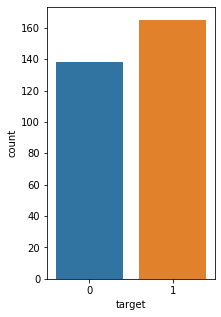

In [13]:
plt.figure(figsize=(3,5))
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)

1    165
0    138
Name: target, dtype: int64


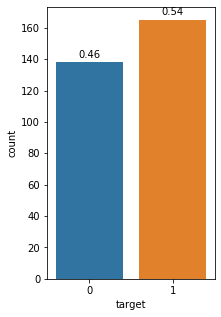

In [14]:
plt.figure(figsize=(3,5))
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)
# for showing the percentage
total = target_temp[0]+target_temp[1]
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 


From the total dataset of 303 patients, 165 (54%) have a heart disease (target=1)

# Percentage of patient with or without heart problems in the given dataset

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [16]:
data["sex"].unique()

array([1, 0], dtype=int64)

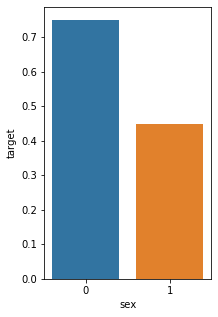

In [17]:
plt.figure(figsize=(3,5))
sns.barplot(data["sex"],data["target"],ci=None)

In [18]:
def plotAge():
    facet_grid = sns.FacetGrid(data, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()

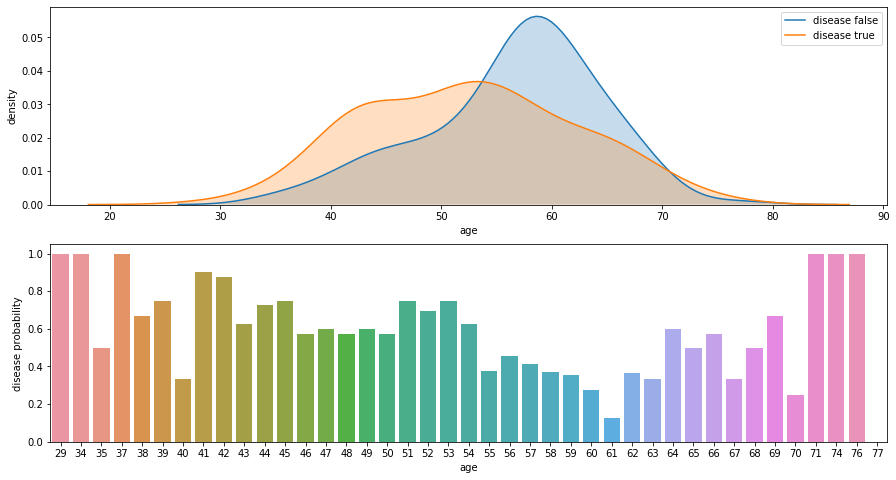

<Figure size 216x216 with 0 Axes>

In [19]:
fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

plotAge()

### Here 0 is female and 1 is male patients

In [20]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:31.68%
Percentage of Male Patients:68.32%


In [21]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [22]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

In [23]:
def plotCategorial(attribute, labels, ax_index):
#     plt.figure(figsize=(3,5))
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


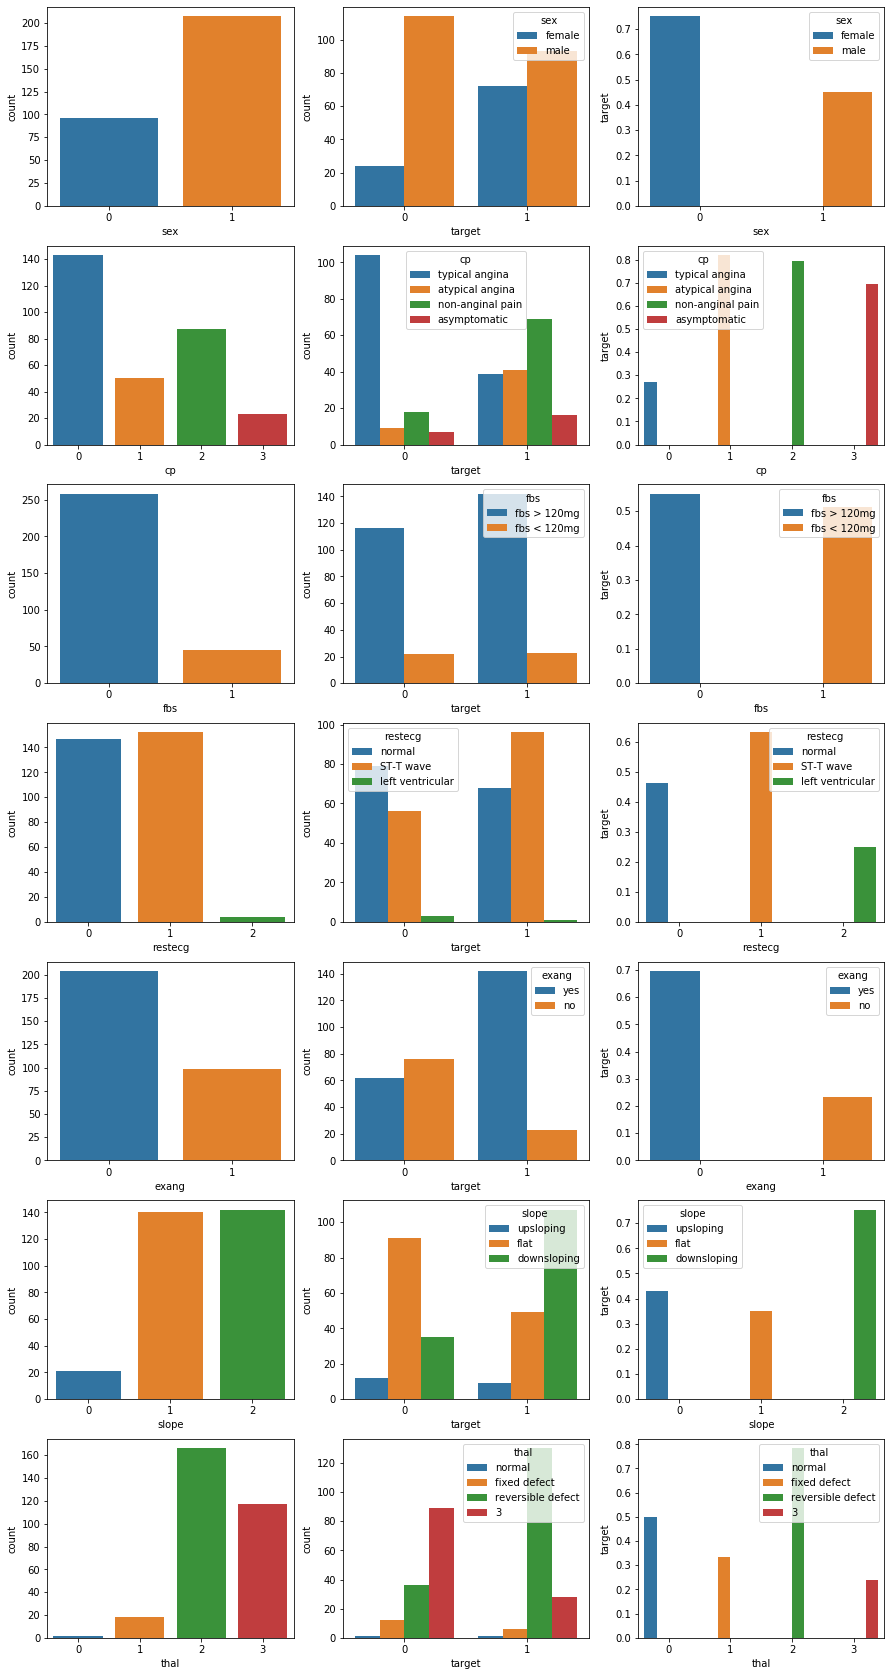

In [24]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

In [25]:
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [26]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

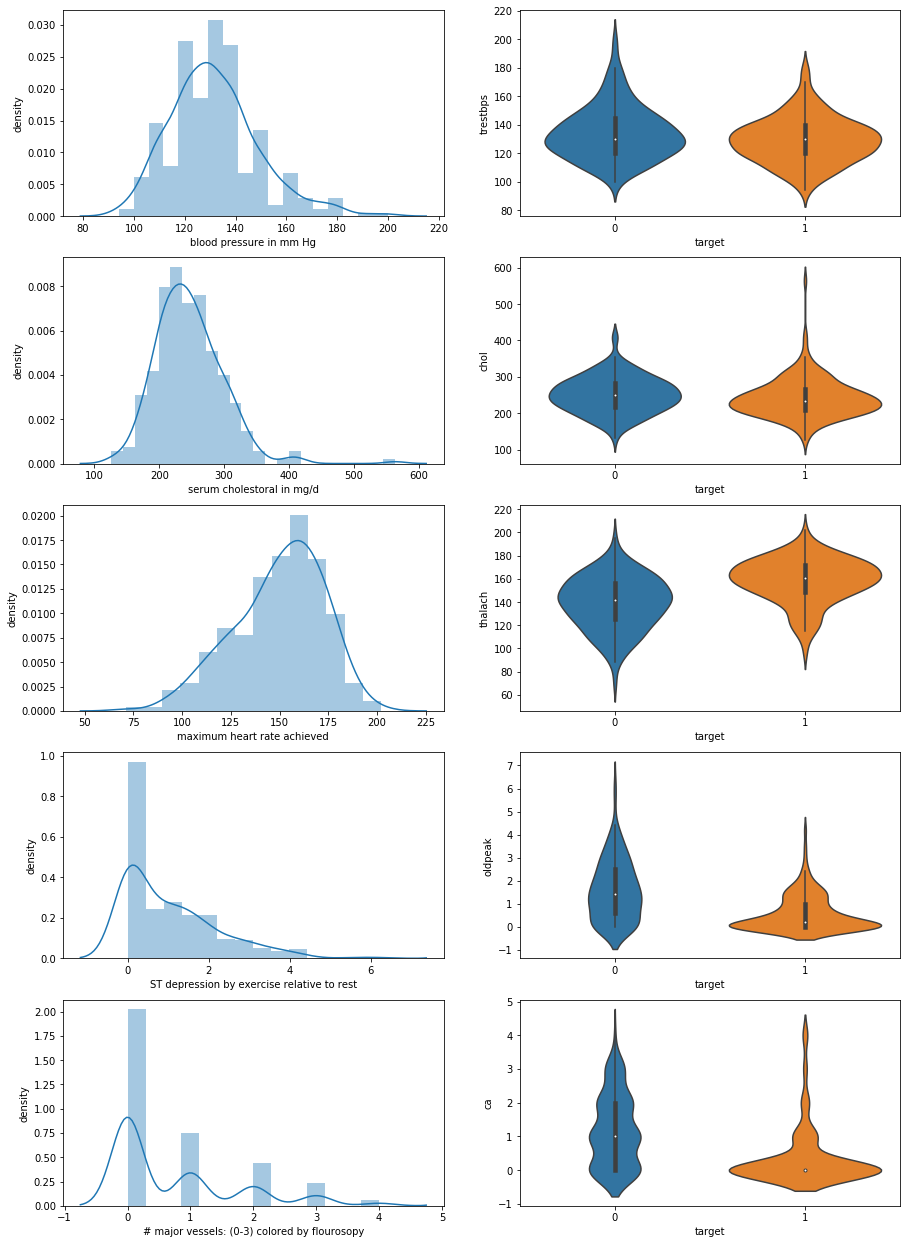

In [27]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

# Heart Disease Frequency for ages

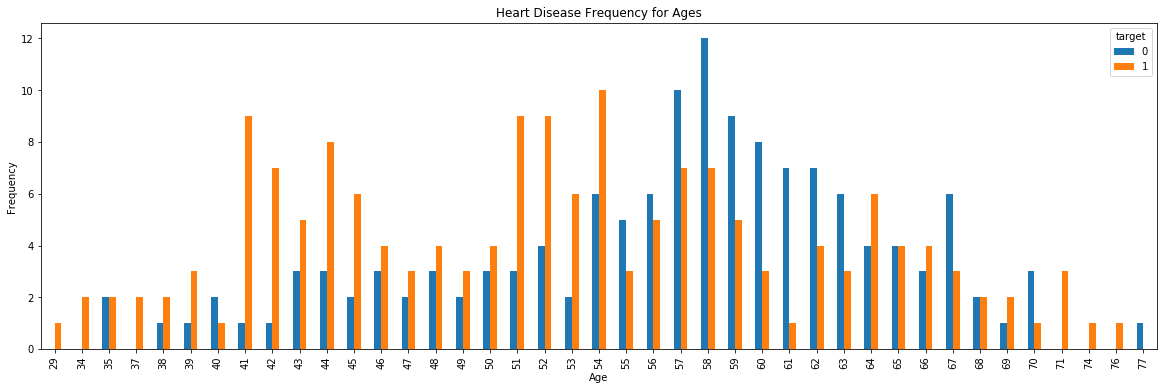

In [28]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

# Heart Disease frequency for sex (where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

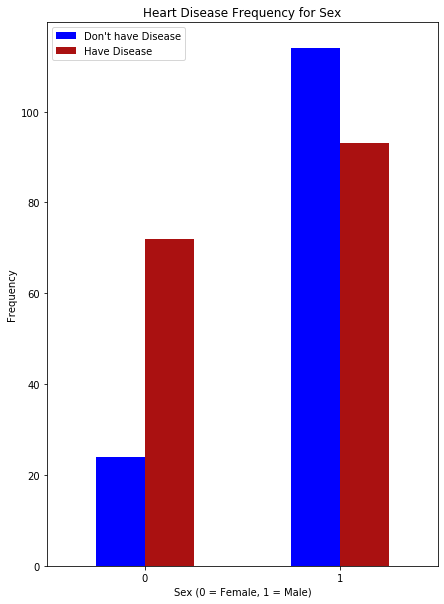

In [29]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(7,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

run this line after prediction

In [30]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [31]:
data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Heart disease according to Fasting Blood sugar 

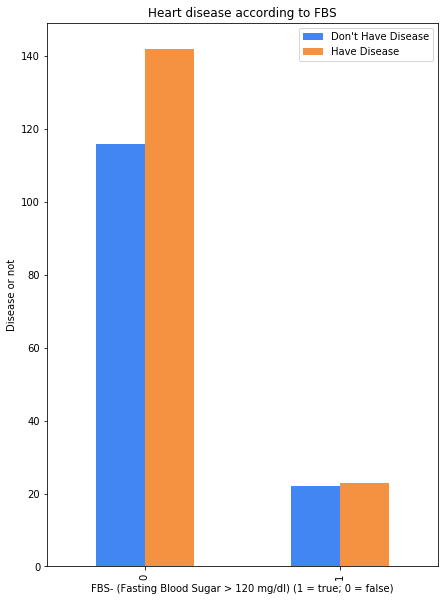

In [32]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(7,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

# Analysing the chest pain (4 types of chest pain)

#[Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic]

In [33]:
data["chest_pain_type"].unique()

array([3, 2, 1, 0], dtype=int64)

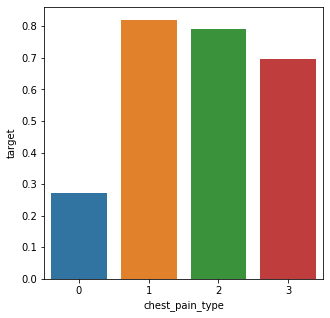

In [34]:
plt.figure(figsize=(5, 5))
sns.barplot(data["chest_pain_type"],y,ci=None)

# Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [35]:
data["resting_blood_pressure"].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

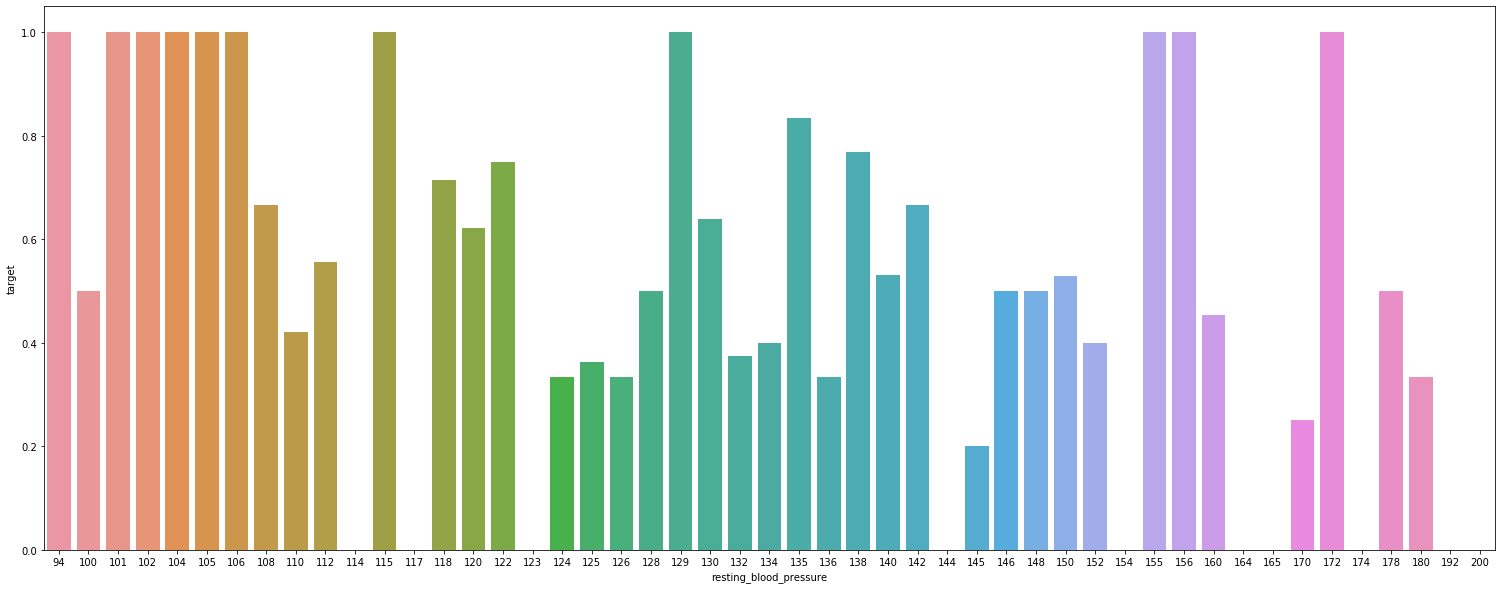

In [36]:
plt.figure(figsize=(26, 10))
sns.barplot(data["resting_blood_pressure"],y,ci=None)

# Analysing the Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [37]:
data["rest_ecg"].unique()

array([0, 1, 2], dtype=int64)

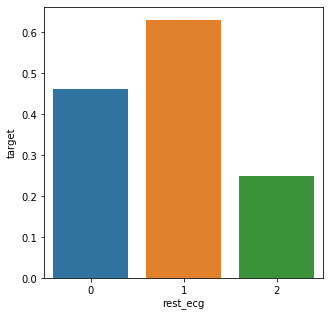

In [38]:
plt.figure(figsize=(5,5))
sns.barplot(data["rest_ecg"],y, ci=None)

## people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

#Analysing Exercise induced angina (1 = yes; 0 = no)

In [39]:
data["exercise_induced_angina"].unique()

array([0, 1], dtype=int64)

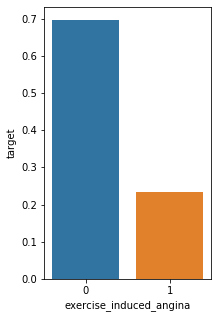

In [40]:
plt.figure(figsize=(3,5))
sns.barplot(data["exercise_induced_angina"],y,ci = None)

###People with exercise_induced_angina=1 are much less likely to have heart problems

# Analysing the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

In [41]:
data["st_slope"].unique()

array([0, 2, 1], dtype=int64)

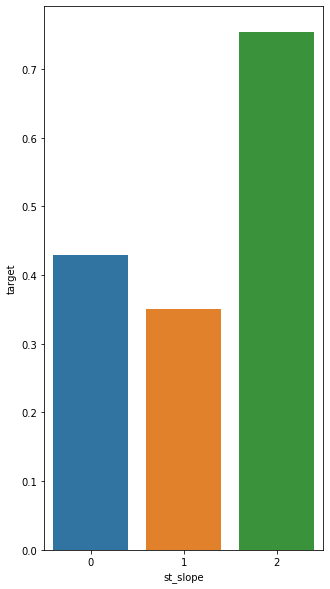

In [42]:
plt.figure(figsize=(5, 10))
sns.barplot(data["st_slope"],y,ci=None)

Slope '2' causes heart pain much more than Slope '0' and '1'

# Analysing number of major vessels (0-3) colored by flourosopy

In [43]:
data["num_major_vessels"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### count num_major vessels

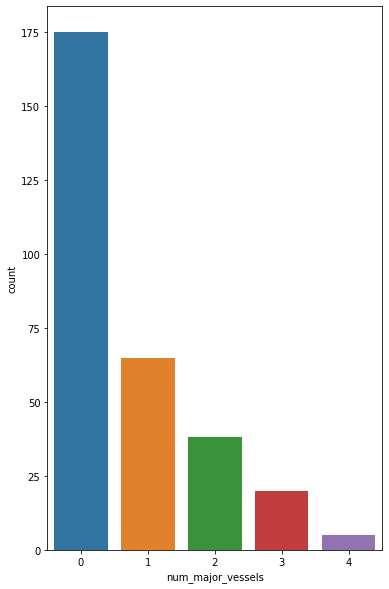

In [44]:
plt.figure(figsize=(6,10))
sns.countplot(data["num_major_vessels"])

### comparing with target

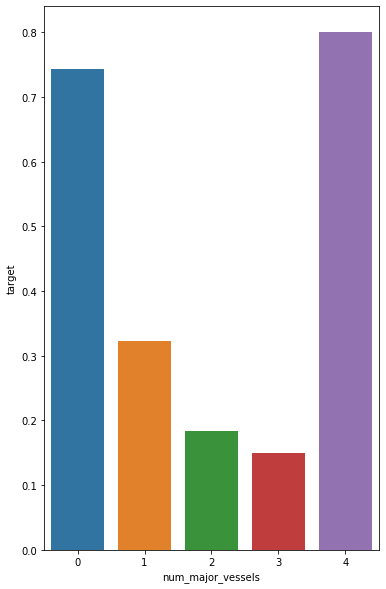

In [45]:
plt.figure(figsize=(6,10))
sns.barplot(data["num_major_vessels"],y,ci=None)

### num_major_vessels=4 has astonishingly large number of heart patients

# Analysing A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)



In [46]:
data["thalassemia"].unique()

array([1, 2, 3, 0], dtype=int64)

### plotting the thalassemia distribution (0,1,2,3)

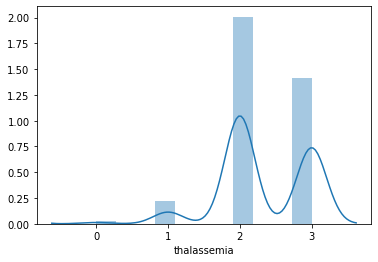

In [47]:
sns.distplot(data["thalassemia"])

### comparing with target

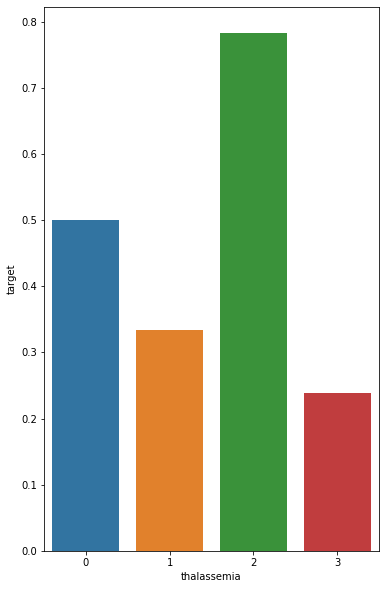

In [48]:
plt.figure(figsize=(6,10))
sns.barplot(data["thalassemia"],y,ci=None)

# thalassemia and cholesterol scatterplot

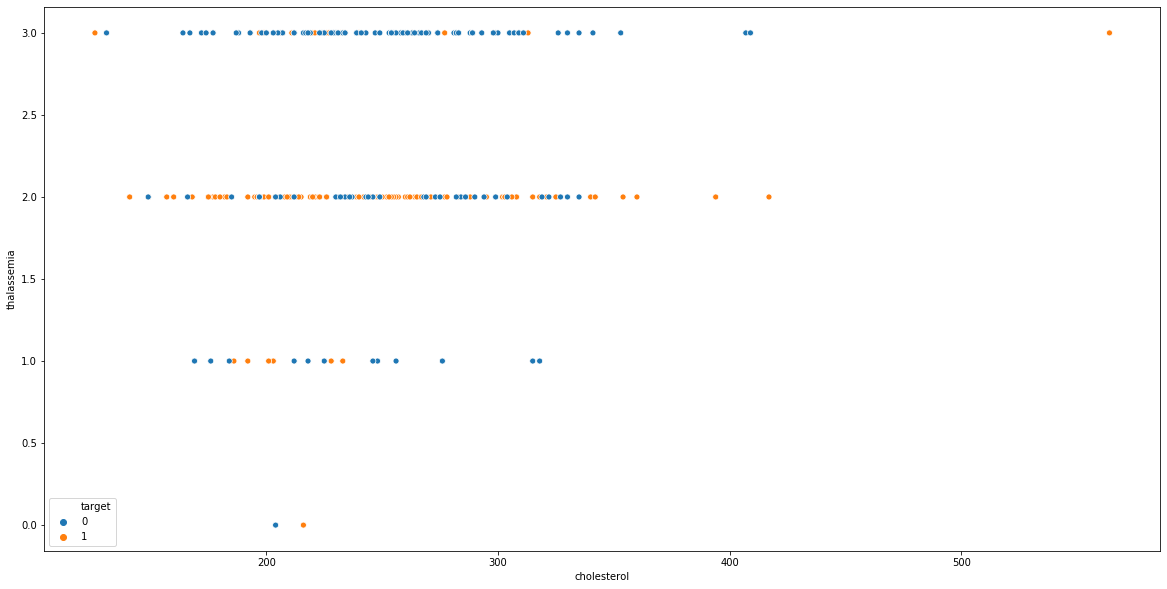

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

# thalassemia vs resting blood pressure scatterplot

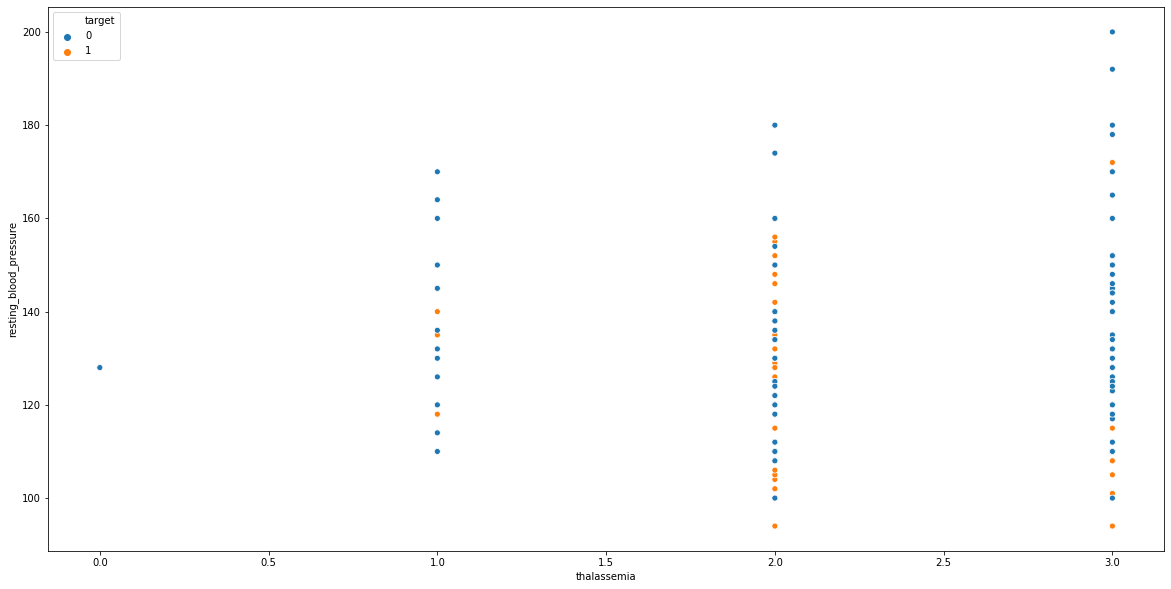

In [50]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

## Health rate vs age

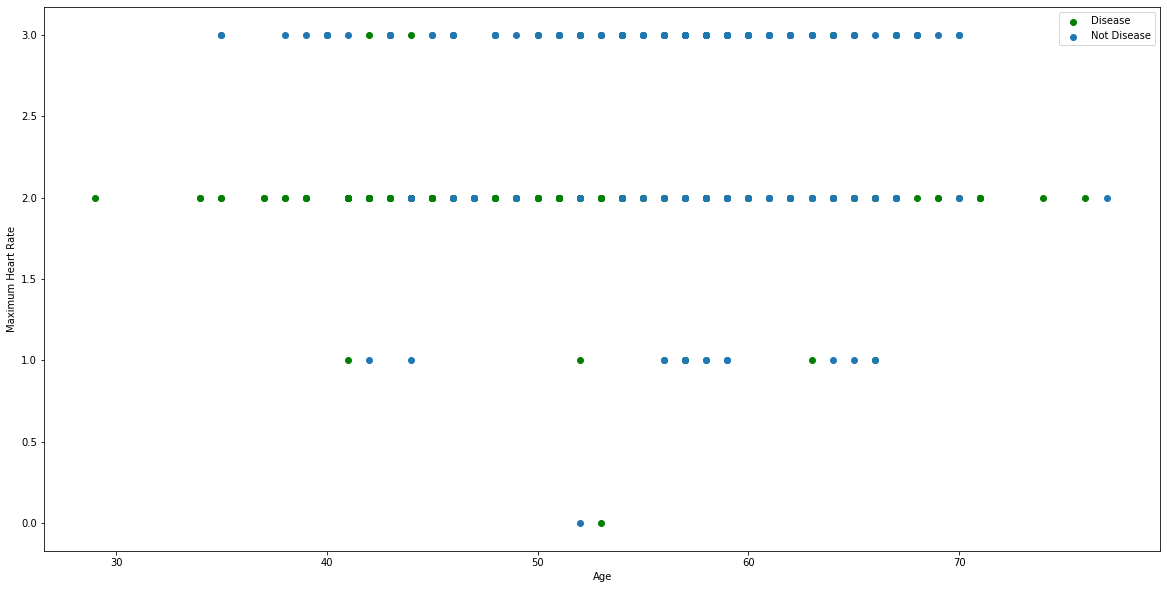

In [51]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

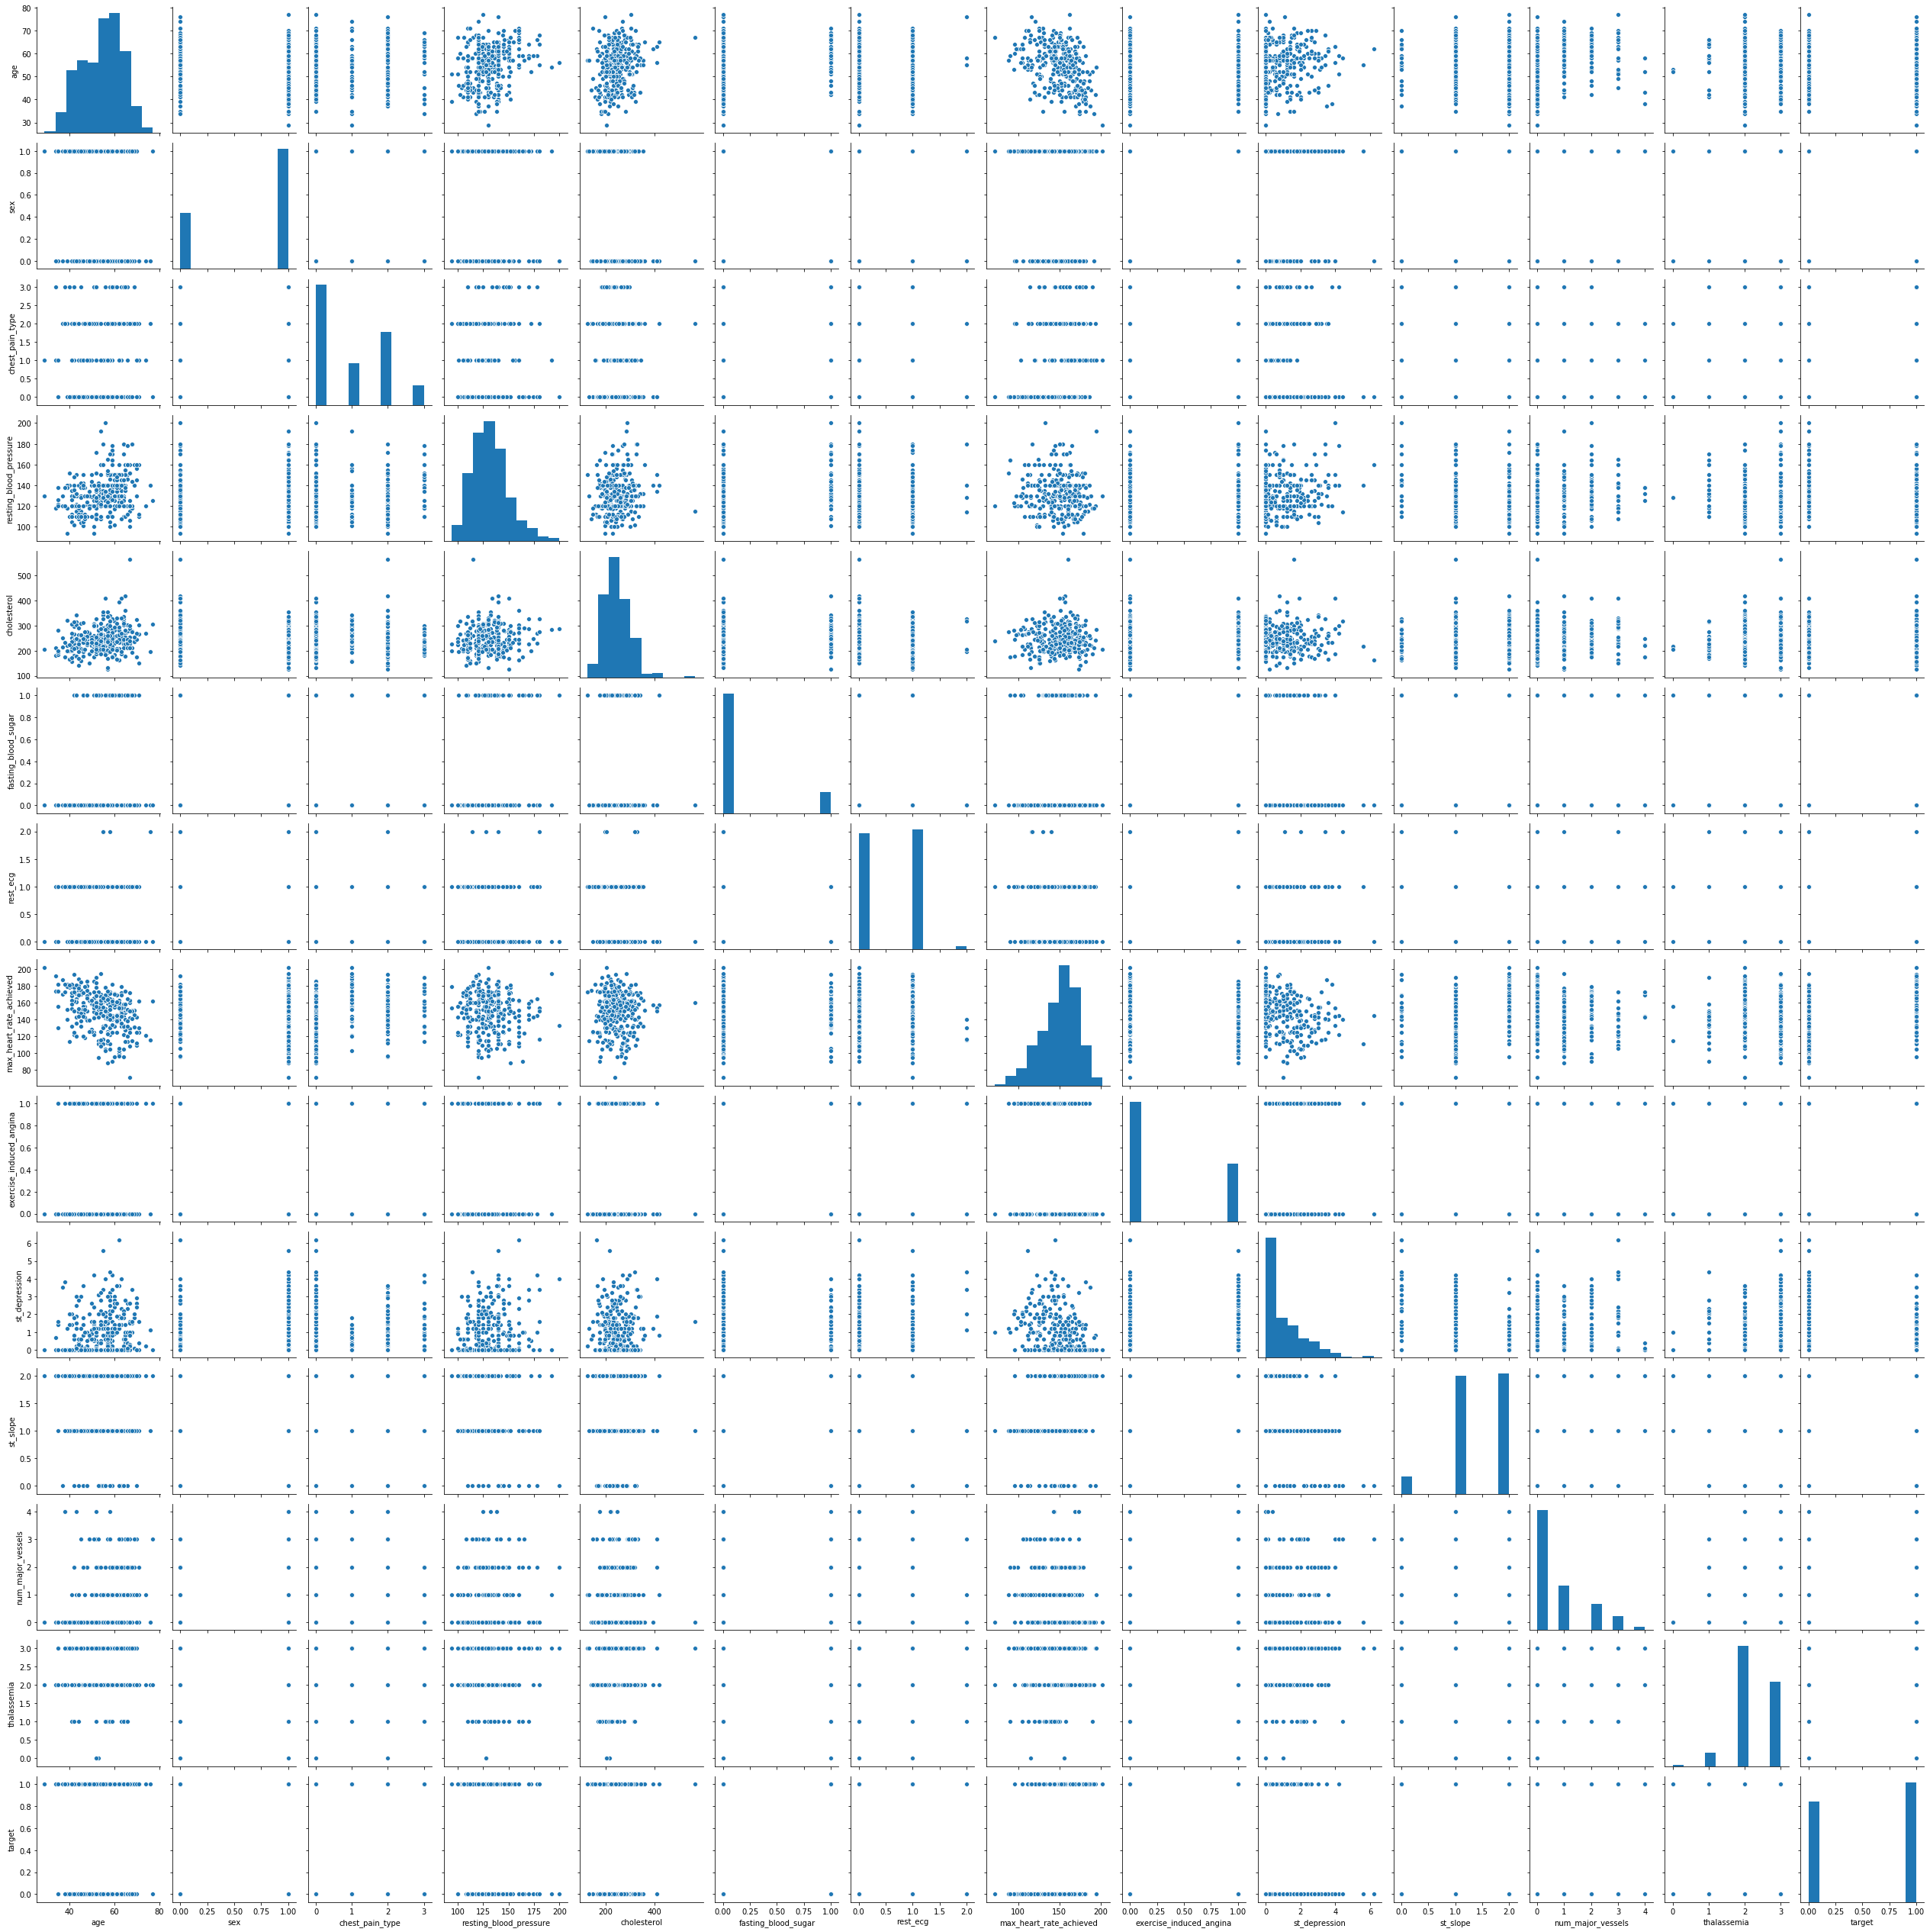

In [52]:
sns_pairplot = sns.pairplot(data=data)
sns_pairplot.savefig("pairplot_all.png")


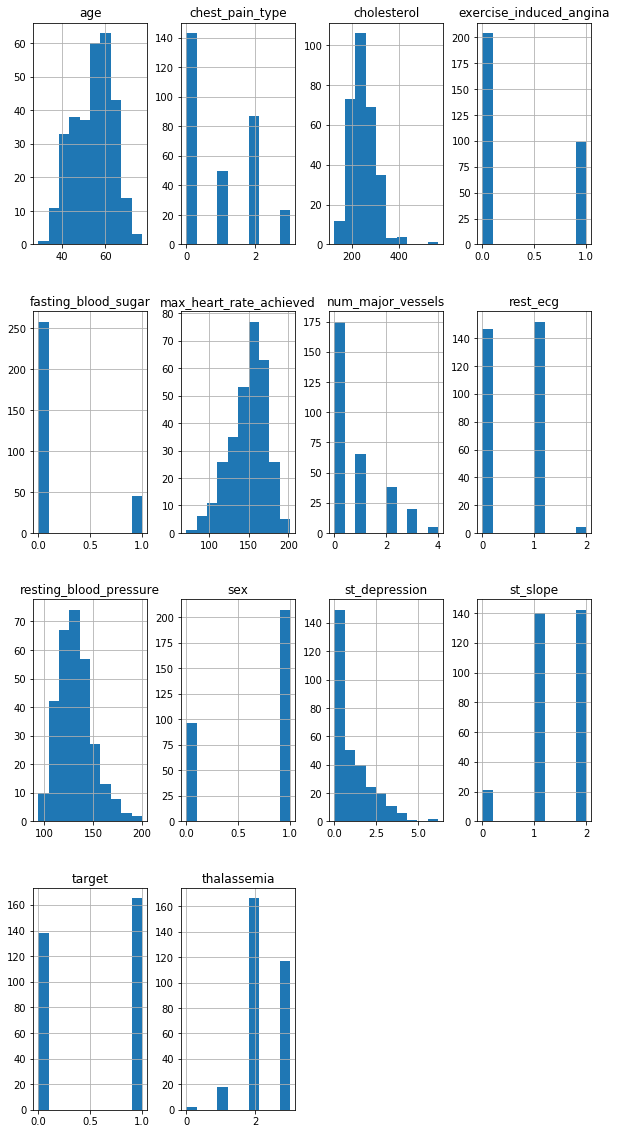

In [53]:
data.hist(figsize=(10,20))
plt.savefig("hist.png")
plt.show()

# Correlation plot

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables

In [54]:
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

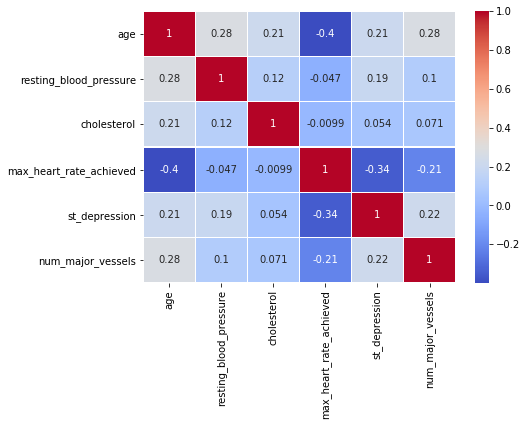

In [55]:
f, ax = plt.subplots(figsize=(7, 5))

df_corr = data.loc[:,cnames]
corr = df_corr.corr()

sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

##Correlation analysis

In [56]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


# Splitting the dataset to Train and Test

In [57]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [58]:
X_train.shape

(242, 13)

In [59]:
X_test.shape

(61, 13)

In [60]:
Y_train.shape

(242,)

In [61]:
Y_test.shape

(61,)

## importing Accuracy score

In [62]:
from sklearn.metrics import accuracy_score

# Modelling and predicting with Machine Learning

In [63]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):
    
    model = classifier(**kwargs)
    
    model.fit(X_train,y_train)
    
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    
    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")
    
    return model

# Logistic regression

In [64]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

y_pred_lr = logreg.predict(X_test)
print(y_pred_lr)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [65]:
score_lr = round(accuracy_score(y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [66]:
from sklearn.linear_model import LogisticRegression
model = train_model(X_train, Y_train, X_test, Y_test, LogisticRegression)

Train accuracy: 85.12%
Test accuracy: 85.25%


# Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
matrix= confusion_matrix(Y_test, y_pred_lr)

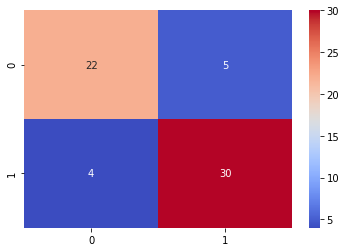

In [69]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")

fmt = d is format = default

# precision Score

In [70]:
from sklearn.metrics import precision_score

In [71]:
precision = precision_score(Y_test, y_pred_lr)

In [72]:
print("Precision: ",precision)

Precision:  0.8571428571428571


# Recall

In [73]:
from sklearn.metrics import recall_score

In [74]:
recall = recall_score(Y_test, y_pred_lr)

In [75]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706




---



# F-Score

balance of precision and recall score

In [76]:
print((2*precision*recall)/(precision+recall))

0.8695652173913043


In [77]:
CM =pd.crosstab(Y_test, y_pred_lr)
CM

col_0,0,1
target,,
0,22,5
1,4,30


In [78]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

false negative

In [79]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train, Y_train)

y_pred_rf = randfor.predict(X_test)
print(y_pred_rf)

[0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0
 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1]


# Learning curve for Training score & cross validation score

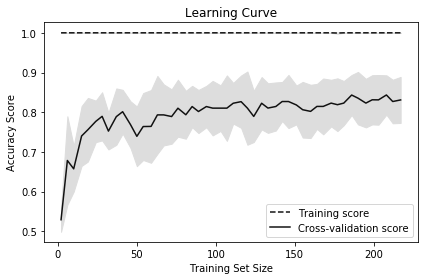

In [81]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),X_train,Y_train,cv=10,scoring='accuracy',
                                                        n_jobs=-1,train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [82]:
score_rf = round(accuracy_score(y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 88.52 %


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.885


Now, let us prune the depth of trees and check the accuracy.

In [84]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


performance metrics
-Accuracy: is the ratio between the number of correct predictions and total number of predications.

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-Precision: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.Precsion tells us about when it predicts yes, how often is it correct.

$Precision (p) = \frac{TP}{TP + FP}$

-Recall: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.Recall gives us an idea about when it’s actually yes, how often does it predict yes.

$recall = \frac{TP}{TP + FN}$

-High recall, low precision: This means that most of the positive examples are correctly recognized (low FN) but there are a   lot of false positives.

-Low recall, high precision: This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

F-score: It is known as the harmonic mean of precision and recall.The F-Measure will always be nearer to the smaller value of Precision or Recall.

$F-score = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease). TN = True negative (has no heart disease). FP = False positive (has no heart disease) FN = False negative (has heart disease)

## confusion matrix of Random Forest

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
matrix= confusion_matrix(Y_test, y_pred_rf)

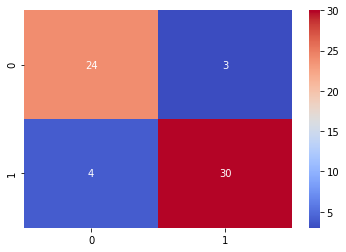

In [87]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")

# precision score

In [88]:
from sklearn.metrics import precision_score

In [89]:
precision = precision_score(Y_test, y_pred_rf)

In [90]:
print("Precision: ",precision)

Precision:  0.9090909090909091


# recall

In [91]:
from sklearn.metrics import recall_score

In [92]:
recall = recall_score(Y_test, y_pred_rf)

In [93]:
print("Recall is: ",recall)

Recall is:  0.8823529411764706


# F score

In [94]:
print((2*precision*recall)/(precision+recall))

0.8955223880597014


In [95]:
CM =pd.crosstab(Y_test, y_pred_rf)
CM

col_0,0,1
target,,
0,24,3
1,4,30


In [96]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## False negative rate of the model

In [97]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB
nb = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

nb.fit(X_train, Y_train)

y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

Train accuracy: 83.47%
Test accuracy: 85.25%
[0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [99]:
score_nb = round(accuracy_score(y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [100]:
from sklearn.naive_bayes import GaussianNB
model = train_model(X_train, Y_train, X_test, Y_test, GaussianNB)

Train accuracy: 83.47%
Test accuracy: 85.25%


## confusion matrix of Naive Bayes

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
matrix= confusion_matrix(Y_test, y_pred_nb)

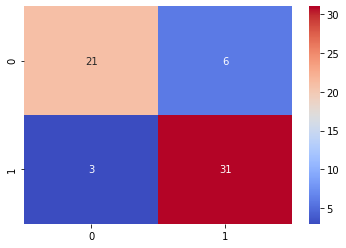

In [103]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")

# precision score

In [104]:
from sklearn.metrics import precision_score

In [105]:
precision = precision_score(Y_test, y_pred_nb)

In [106]:
print("Precision: ",precision)

Precision:  0.8378378378378378


# recall

In [107]:
from sklearn.metrics import recall_score

In [108]:
recall = recall_score(Y_test, y_pred_nb)

In [109]:
print("Recall is: ",recall)

Recall is:  0.9117647058823529


# f score

In [110]:
print((2*precision*recall)/(precision+recall))

0.8732394366197184


In [111]:
CM = pd.crosstab(Y_test, y_pred_nb)
CM

col_0,0,1
target,,
0,21,6
1,3,31


In [112]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [113]:
fnr = FN*100/(FN+TP)
fnr

8.823529411764707

# KNN(K Nearest Neighbors)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train, Y_train)

y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

Train accuracy: 71.90%
Test accuracy: 68.85%
[0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0
 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0]


In [115]:
score_knn = round(accuracy_score(y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 68.85 %


In [116]:
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier)

Train accuracy: 78.10%
Test accuracy: 63.93%


Let's see if KNN can perform even better by trying different 'n_neighbours' inputs.

In [117]:
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train, Y_train, X_test, Y_test, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 52.46%
n_neigbors = 2
Train accuracy: 79.75%
Test accuracy: 59.02%
n_neigbors = 3
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 4
Train accuracy: 76.03%
Test accuracy: 63.93%
n_neigbors = 5
Train accuracy: 78.10%
Test accuracy: 63.93%
n_neigbors = 6
Train accuracy: 74.38%
Test accuracy: 65.57%
n_neigbors = 7
Train accuracy: 72.31%
Test accuracy: 67.21%
n_neigbors = 8
Train accuracy: 71.90%
Test accuracy: 68.85%
n_neigbors = 9
Train accuracy: 73.14%
Test accuracy: 67.21%


It turns out that value of n_neighbours (8) is optimal.

## Confusion matrix

In [118]:
from sklearn.metrics import confusion_matrix

In [119]:
matrix= confusion_matrix(Y_test, y_pred_knn)

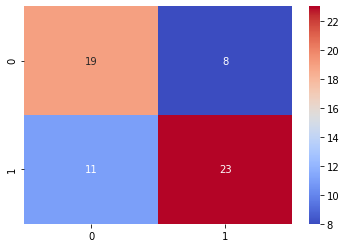

In [120]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")

# precision score

In [121]:
from sklearn.metrics import precision_score

In [122]:
precision = precision_score(Y_test, y_pred_knn)

In [123]:
print("Precision: ",precision)

Precision:  0.7419354838709677


# recall

In [124]:
from sklearn.metrics import recall_score

In [125]:
recall = recall_score(Y_test, y_pred_knn)

In [126]:
print("Recall is: ",recall)

Recall is:  0.6764705882352942


# f score

In [127]:
print((2*precision*recall)/(precision+recall))

0.7076923076923077


In [128]:
CM = pd.crosstab(Y_test, y_pred_knn)
CM

col_0,0,1
target,,
0,19,8
1,11,23


In [129]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

## false negative rate of the model

In [130]:
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

## false negative rate

In [131]:
CM = pd.crosstab(Y_test, y_pred_knn)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

32.35294117647059

# Decision Tree

In [132]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3, random_state=0)

dt.fit(X_train, Y_train)

y_pred_dt = dt.predict(X_test)
print(y_pred_dt)

[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1]


In [133]:
score_dt = round(accuracy_score(y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


In [134]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [135]:
tree1 = DecisionTreeClassifier(max_depth=3, random_state=0)
tree1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, Y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.820


# Discision Tree Visualization

In [188]:
df = pd.read_csv('heart.csv')

In [189]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [190]:
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing

In [191]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,    
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [192]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,Y_train)

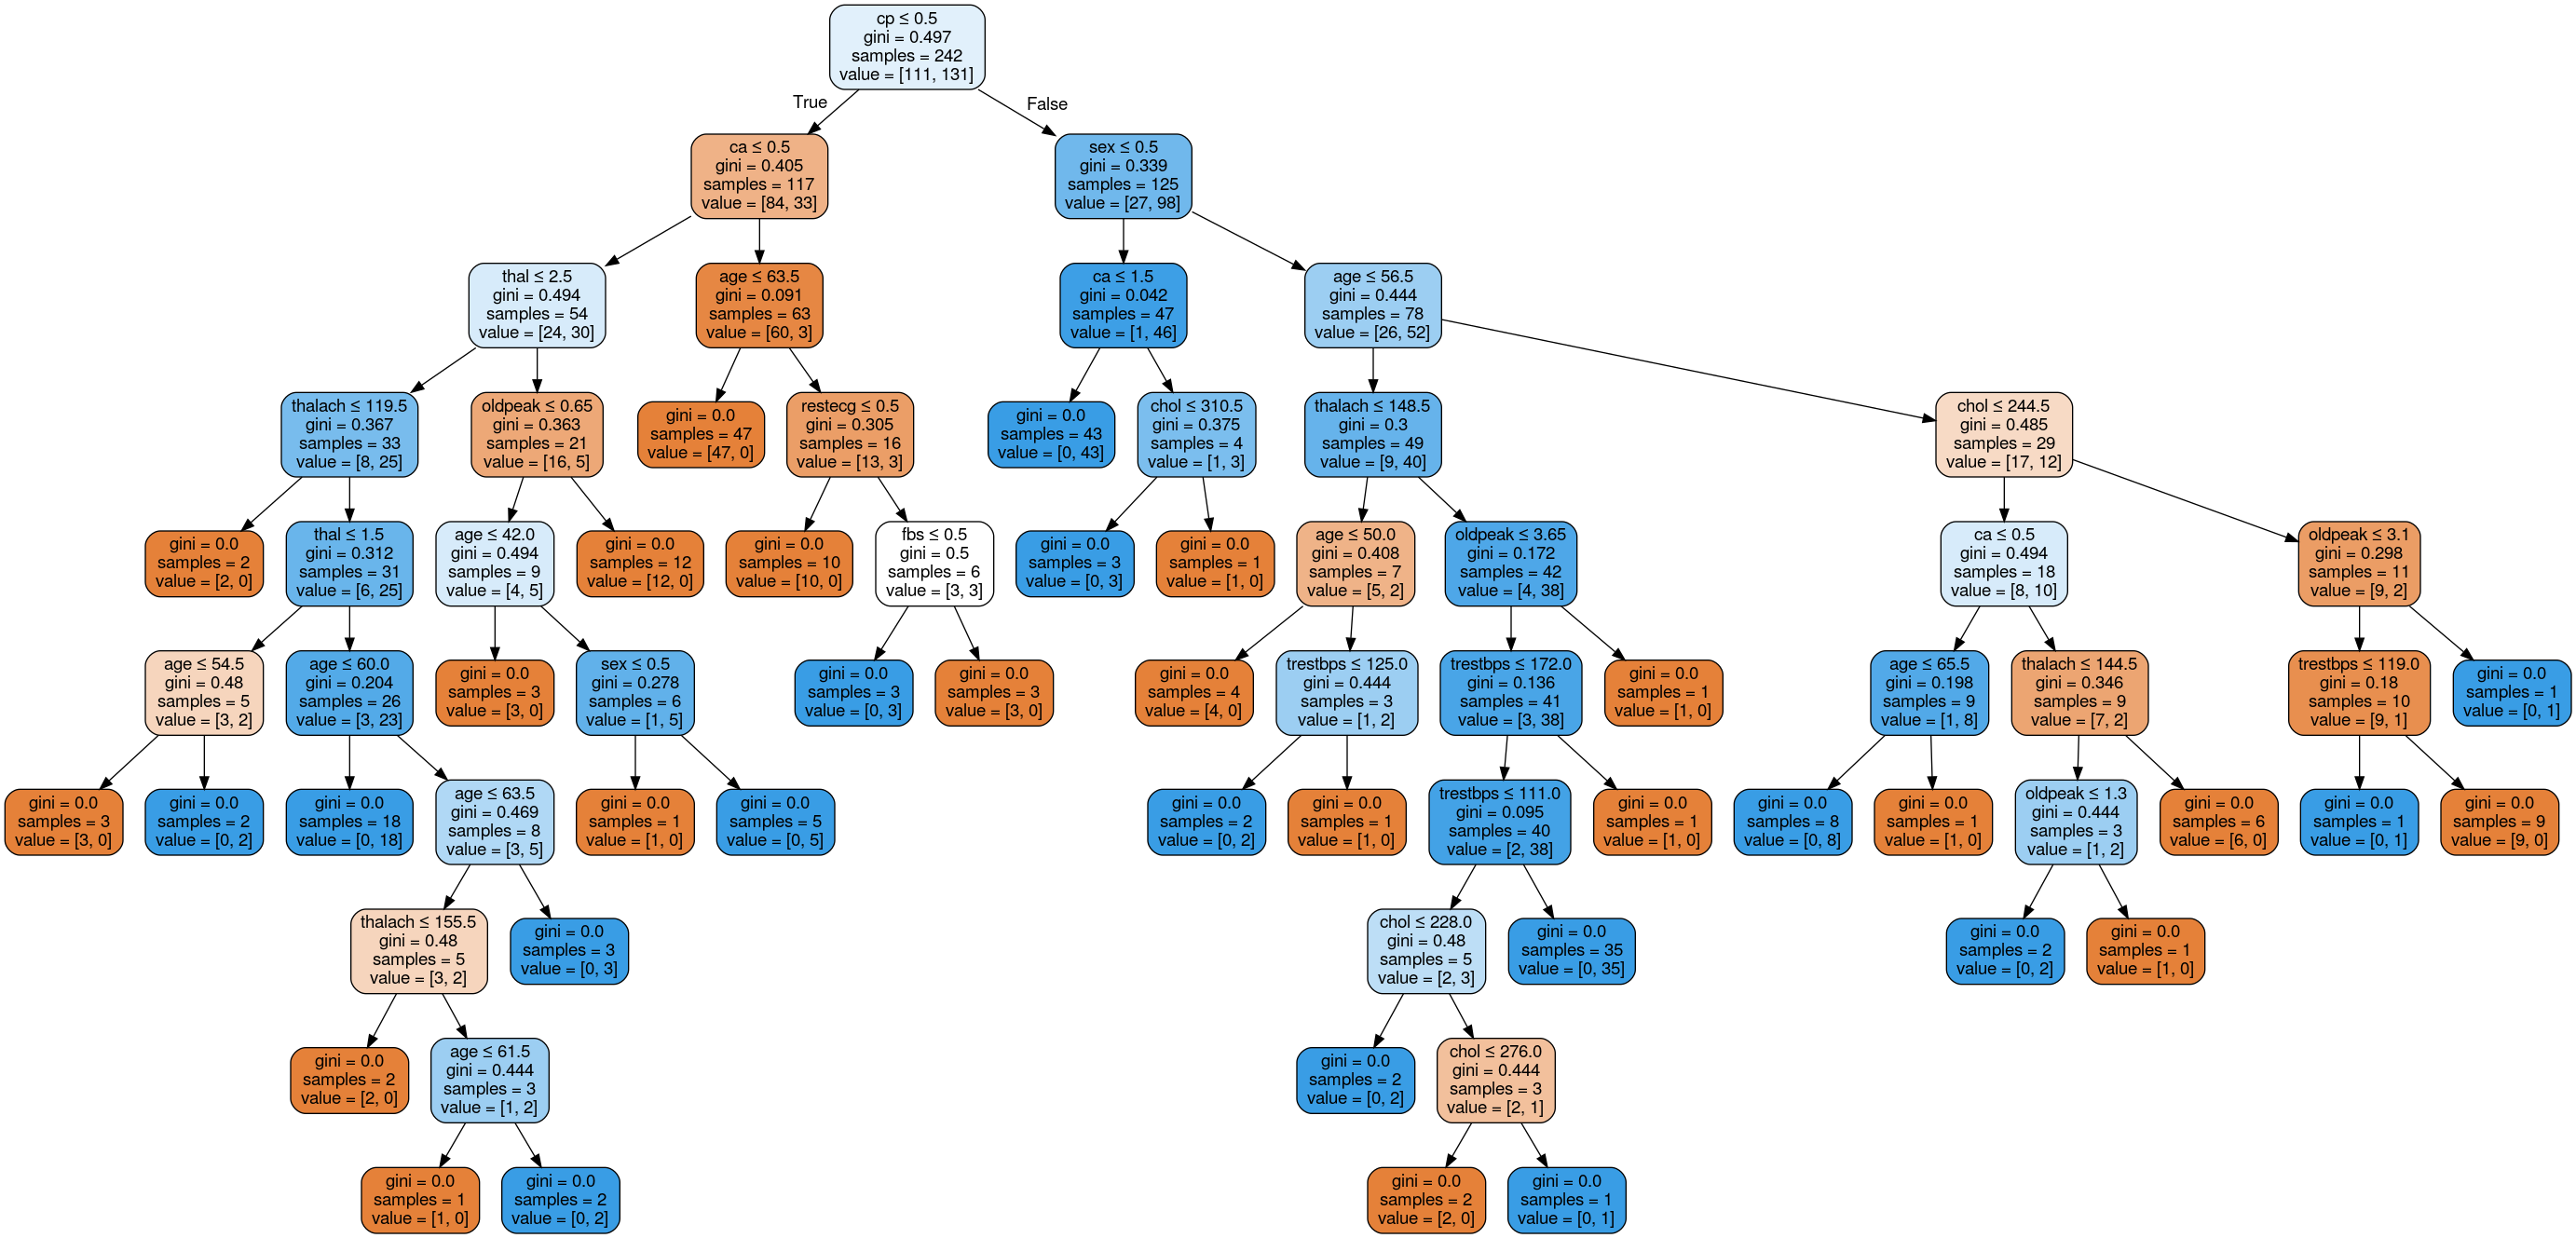

In [193]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

# Depth 1

In [194]:
from sklearn import tree
HOW_DEEP_TREES = 1
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=HOW_DEEP_TREES)
clf = clf.fit(X_train, Y_train)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [195]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

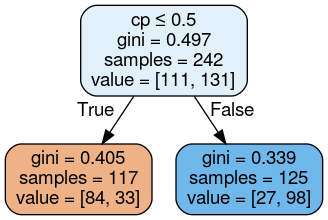

In [196]:
plot_decision_tree(clf, X_train.columns,df.columns[1])

## Confusion Matrix

In [136]:
from sklearn.metrics import confusion_matrix

In [137]:
matrix= confusion_matrix(Y_test, y_pred_dt)

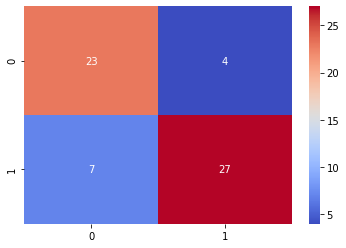

In [138]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")

# precision score

In [139]:
from sklearn.metrics import precision_score

In [140]:
precision = precision_score(Y_test, y_pred_dt)

In [141]:
print("Precision: ",precision)

Precision:  0.8709677419354839


# recall

In [142]:
from sklearn.metrics import recall_score

In [143]:
recall = recall_score(Y_test, y_pred_dt)

In [144]:
print("Recall is: ",recall)

Recall is:  0.7941176470588235


# f score

In [145]:
print((2*precision*recall)/(precision+recall))

0.8307692307692308


In [146]:
CM = pd.crosstab(Y_test, y_pred_dt)
CM

col_0,0,1
target,,
0,23,4
1,7,27


## false negative rate

In [147]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr

20.58823529411765

# SVM

In [148]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)


In [149]:
score_svc = round(accuracy_score(y_pred_svc,Y_test)*100,2)

print("The accuracy score achieved using SVM is: "+str(score_svc)+" %")

The accuracy score achieved using SVM is: 81.97 %


In [150]:
y_pred_svc

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

# Confusion Matrix

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
matrix= confusion_matrix(Y_test, y_pred_svc)

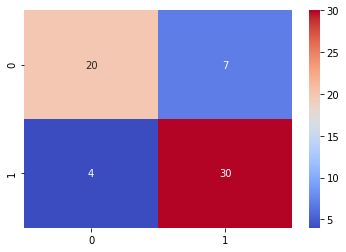

In [153]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")
plt.show()

# precision score

In [154]:
from sklearn.metrics import precision_score

In [155]:
precision = precision_score(Y_test, y_pred_svc)

In [156]:
print("Precision: ",precision)

Precision:  0.8108108108108109


# recall score

In [157]:
from sklearn.metrics import recall_score

In [158]:
recall = recall_score(Y_test, y_pred_svc)

In [159]:
print("recall: ",recall)

recall:  0.8823529411764706


# f Score

In [160]:
print((2*precision*recall)/(precision+recall))

0.8450704225352113


In [161]:
CM =pd.crosstab(Y_test, y_pred_svc)
CM

col_0,0,1
target,,
0,20,7
1,4,30


In [162]:
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

### false negative

In [163]:
fnr=FN*100/(FN+TP)
fnr

11.764705882352942

# Artificial Neural Network

In [164]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [165]:
X_test1 = StandardScaler().fit_transform(X_test)
X_train1 = StandardScaler().fit_transform(X_train)
Y_test1=np_utils.to_categorical(Y_test)
Y_train1=np_utils.to_categorical(Y_train)

In [166]:
#print(X_test1.shape, Y_train1.shape)

In [167]:
#model = Sequential()
#model.add(Dense(16, input_dim=13,activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.3))

#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(2, activation='softmax'))

In [168]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
#history = model.fit(X_train1, Y_train1,validation_data = (X_test1,Y_test1), epochs=20, batch_size=16)

In [170]:
#max_model.save("model_ann_91.8.hdf5")
from keras.models import load_model
m = load_model("model_ann_91.8.hdf5")

In [171]:
y_pred = m.predict(X_test1)
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
test = list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test1[i]))
y_pred_ann = np.array(pred)#.reshape(-1)
y_pred_ann

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [172]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score,accuracy_score

In [173]:
score_ann = round(accuracy_score(test, y_pred_ann)*100,2)
score_ann

91.8

In [174]:
precision = precision_score(test, y_pred_ann)

In [175]:
print("Precision: ",precision)

Precision:  0.9142857142857143


## Recall

In [176]:
recall = recall_score(test,y_pred_ann)

In [177]:
print("Recall: ",recall)

Recall:  0.9411764705882353


## Confusion Matrix

In [178]:
matrix= confusion_matrix(test, y_pred_ann)

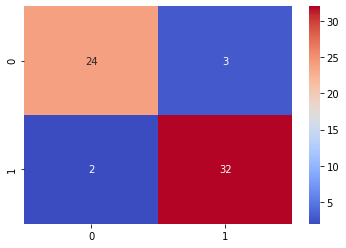

In [179]:
sns.heatmap(matrix,annot = True,cmap='coolwarm', fmt = "d")
plt.show()

In [180]:
print((2*precision*recall)/(precision+recall))

0.9275362318840579


## False negative rate

In [181]:
CM = pd.crosstab(Y_test,y_pred_ann)
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]
fnr = FN*100/(FN+TP)
fnr


5.882352941176471

# FINAL SCORE

In [182]:
accuracy = [score_knn, score_dt, score_lr, score_nb, score_rf, score_svc, score_ann]

classifiers = ['KNN', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'Random Forests','SVM', 'Artificial Neural Networks']

# models = [KNeighborsClassifier(n_neighbors=8), DecisionTreeClassifier(max_depth=3, random_state=0), LogisticRegression(), 
#         GaussianNB(), RandomForestClassifier(n_estimators=100, random_state=0), SVC(kernel='poly')]

# # loop through algorithms and append the score into the list
# for i in models:
#     model = i
#     model.fit(X_train, Y_train)
#     score = model.score(X_test, Y_test)
#     accuracy.append(score)
# accuracy.append(acc)
# # classifiers.append("ANN")


In [183]:
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)       
summary

,accuracy
KNN,68.85
Decision Trees,81.97
Logistic Regression,85.25
Naive Bayes,85.25
Random Forests,88.52
SVM,81.97
Artificial Neural Networks,91.80


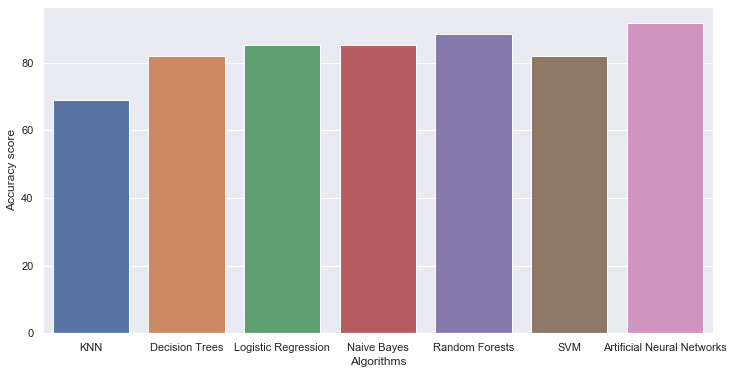

In [184]:
scores = [score_lr,score_nb,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","Random Forest"] 
plt.figure(figsize=(12,6))
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(classifiers,accuracy)



---



##  $\;\;\;\;\;\;\;\;\;\;\;\;\;\;$ Logistic$\;\;\;\;\;\;\;$Random$\;\;\;\;\;\;\;$Naive$\;\;\;\;\;\;\;$KNN$\;\;\;\;\;\;\;$Decision$\;\;\;\;\;\;\;$SVM$\;\;\;\;\;\;\;$ANN
##  $\;\;\;\;\;\;\;\;\;\;\;\;$ Regression$\;\;\;\;\;$Forest$\;\;\;\;\;\;\;\;\;$Bayes$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$Tree

## Accuracy$\;\;\;\;\;$85.25$\;\;\;\;\;\;\;\;\;$88.52$\;\;\;\;\;\;\;\;\;$85.25$\;\;\;\;\;\;\;\;$68.85$\;\;\;\;\;\;\;$81.97$\;\;\;\;\;\;\;\;\;$81.97$\;\;\;\;\;\;\;$91.80 
## $\;\;$Score

## Prediciton$\;\;\;\;$0.857$\;\;\;\;\;\;\;\;\;$0.909$\;\;\;\;\;\;\;\;\;$0.837$\;\;\;\;\;\;\;$0.718$\;\;\;\;\;\;\;$0.848$\;\;\;\;\;\;\;\;\;$0.810$\;\;\;\;\;\;\;$0.914 
## $\;\;$Score

## Recall$\;\;\;\;\;\;\;\;$0.882$\;\;\;\;\;\;\;\;\;$0.911$\;\;\;\;\;\;\;\;\;$0.911$\;\;\;\;\;\;\;$0.676$\;\;\;\;\;\;\;$0.823$\;\;\;\;\;\;\;\;\;\;\;$0.882$\;\;\;\;\;\;\;$0.941
## Score

## $\;\;$F$\;\;\;\;\;\;\;\;\;\;\;\;$0.869$\;\;\;\;\;\;\;\;\;$0.895$\;\;\;\;\;\;\;\;\;$0.873$\;\;\;\;\;\;\;$0.707$\;\;\;\;\;\;\;$0.835$\;\;\;\;\;\;\;\;\;\;\;$0.845$\;\;\;\;\;\;\;$0.927
## Score

## $\;$ False$\;\;\;\;\;$11.764$\;\;\;\;\;\;\;\;\;$11.764$\;\;\;\;\;\;\;\;\;$8.823$\;\;\;\;\;\;\;$32.352$\;\;\;\;\;\;\;$20.588$\;\;\;\;\;\;\;$11.764$\;\;\;\;\;$5.882
## Negative 
## $\;\;$Rate

# So  Aritificial Neural Network is the best here and Random Forest algorithm is the 2nd Best
## And here KNN is the worst algorithm